Python code for generating figures used in the paper "Composite Bulges -- II. Classical Bulges and Nuclear Disks in Barred Galaxies: The Contrasting Cases of NGC 4608 and NGC 4643" (Erwin et al. 2020, submitted)

Note that many of the final figures were assembled in Adobe Illustrator out of individual plots and images (and
then saved as PDF files). This notebook includes Python commands and code used to generate most of the individual
plots. The exceptions are the color JPEG images in Figure 1 (which were taken from the NASA Extragalactic Database) and the grayscale "ratio" images in Figures xxx, which were generated using IRAF and SAOImage DS9.

## Preparatory Setup

In [1]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

# kludge to fix matplotlib's font_manager bug which mistakenly ID's "Times New Roman Bold.ttf" as
# indicating a "roman" (i.e., "normal") weight
try:
    del matplotlib.font_manager.weight_dict['roman']
except KeyError:
    pass
matplotlib.font_manager._rebuild()

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
import os
import scipy.stats
from astropy.io import fits
from scipy.ndimage import median_filter

In [3]:
# CHANGE THIS TO POINT TO APPROPRIATE LOCAL DIRECTORY (DEFAULT = SAME DIRECTORY AS THIS NOTEBOOK)
baseDir = "/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/"
projDir = baseDir + "public/"
os.chdir(projDir)
#projDir = os.getcwd() + "/"
sys.path.append(projDir)
dataDir = projDir + "data/"

# CHANGE THIS TO POINT TO APPROPRIATE LOCAL DIRECTORY -- this is where PDF figures will be saved
plotDir = baseDir + "plots/"

# set the following to True in order to save the figures as PDF files
savePlots = False

### Load Images (used more than once)

In [4]:
# IRAC1 image for NGC 4608 and WFC3-IR F160W images for both galaxies do not have standard
# orientation (N = up, E = left), so we load "derotated" versions that do.
n4608irac1ss_im = fits.getdata(dataDir + "spitzer_images/n4608irac1ss_derot.fits")
n4608irac1ss_im_m5 = median_filter(n4608irac1ss_im, 5)
n4608f160w_im = fits.getdata(dataDir + "hst_images/n4608_f160w_derot.fits")
n4608f160w_im_m5 = median_filter(n4608f160w_im, 5)

n4643irac1ss = fits.getdata(dataDir + "spitzer_images/n4643irac1ss.fits")
n4643irac1ss_m5 = median_filter(n4643irac1ss,5)
n4643f160w_im = fits.getdata(dataDir + "hst_images/n4643_f160w_derot.fits")
n4643f160w_im_m5 = median_filter(n4643f160w_im, 5)

## Figure 2: NGC 4608

#### Spitzer IRAC1 isophote contour plot

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:265: RuntimeWarning: divide by zero encountered in log10
  imData = np.log10(imData)
/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:265: RuntimeWarning: invalid value encountered in log10
  imData = np.log10(imData)


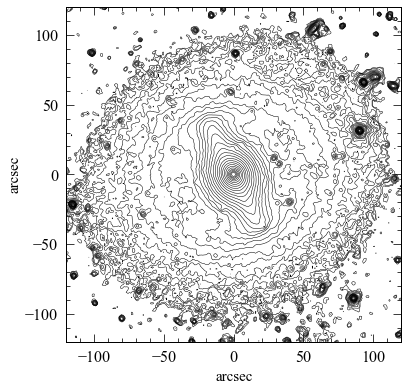

In [5]:
pu.nicecont(n4608irac1ss_im_m5, 931,1189,400, log=True,levels=np.arange(-1.6,1.5,0.1), \
pix=0.6,axisLabel='arcsec', labelSize=15)
if savePlots:
    savefig(plotDir+"n4608_irac1ss_m5_cont400_240x240arcsec_mod.pdf")

#### HST WFC3-IR F160W isophote contour plots

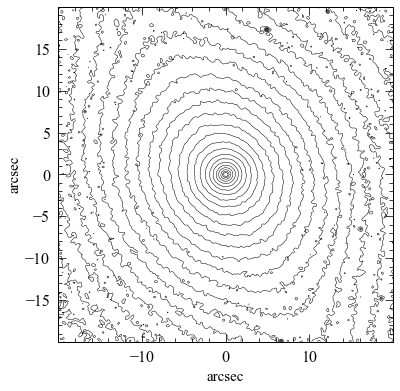

In [6]:
pu.nicecont(n4608f160w_im_m5, 1429,1344,666, log=True,levels=np.arange(2.5,4.9,0.1),\
pix=0.06,axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(plotDir+"n4608f160w_cont666_40x40arcsec_mod.pdf")

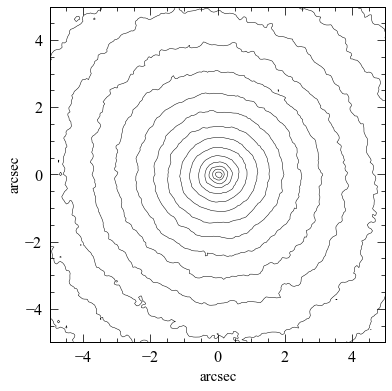

In [7]:
pu.nicecont(n4608f160w_im, 1429,1344,166, log=True,levels=np.arange(3.1,5.2,0.1),\
pix=0.06,axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(plotDir+"n4608f160w_cont166_10x10arcsec_mod.pdf")

**Note:** The two $g - i$ colormaps in Figure 2 were generated using SAOImage DS9 (loaded from FITS files and then saved as JPEGs).

## Figure 3: NGC 4643

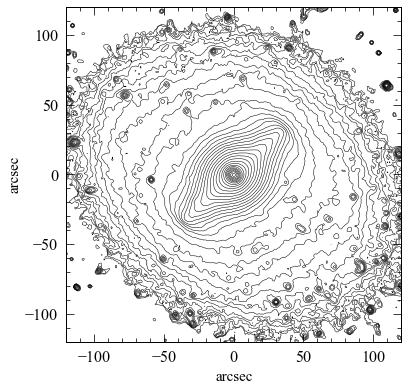

In [8]:
pu.nicecont(n4643irac1ss_m5, 446,781,320, log=True,levels=np.arange(-1.7,1.8,0.1), \
pix=0.75,axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(plotDir+"n4643_irac1ss_m5_cont320_mod.pdf")

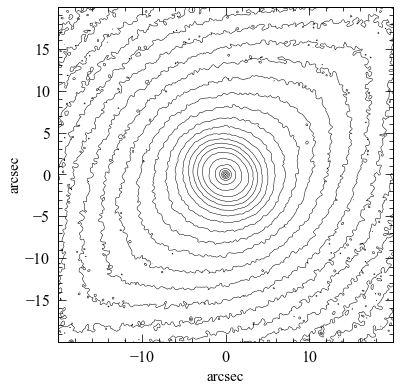

In [9]:
pu.nicecont(n4643f160w_im_m5, 1416,1484,666, log=True,levels=np.arange(2.8,5.2,0.1),pix=0.06,\
axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(plotDir+"n4643f160w_cont666_40x40arcsec_mod.pdf")

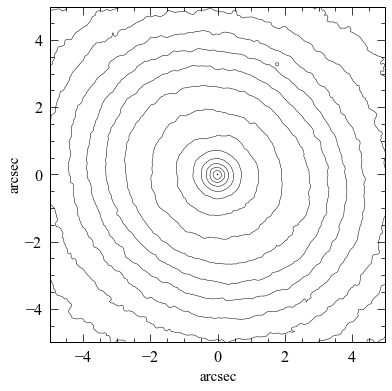

In [10]:
pu.nicecont(n4643f160w_im, 1416,1484,166, log=True,levels=np.arange(3.5,5.4,0.1),pix=0.06,\
axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(plotDir+"n4643f160w_cont166_10x10arcsec_mod.pdf")

**Note:** The two $g - i$ colormaps in Figure 3 were generated using SAOImage DS9 (loaded from FITS files and then saved as JPEGs).

## Figure 4: Ellipse Fits

/Users/erwin/coding/python_scripts/ellipsefits.py:1624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(new_labels2)


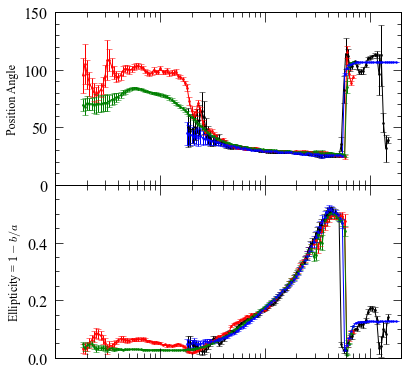

In [11]:
n4608irac1_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608irac1ss.fits",pix=0.6,telPA=119.07)
n4608irac1_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608irac1_model.fits",pix=0.6,telPA=119.07)
n4608f160w_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608f160w.fits",pix=0.06,telPA=161.63)
n4608f160w_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608f160w_model.fits",pix=0.06,telPA=161.63)

(ax1,ax2) = ellipse.PlotEllPA([n4608irac1_efit,n4608f160w_efit, n4608f160w_model,n4608irac1_model], xlog=True, merge=True,xrange=[0.1,200], xtitle='')
ax2.set_xticklabels([])
if savePlots:
    savefig(plotDir+"n4608_efits.pdf")

/Users/erwin/coding/python_scripts/ellipsefits.py:1624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(new_labels2)


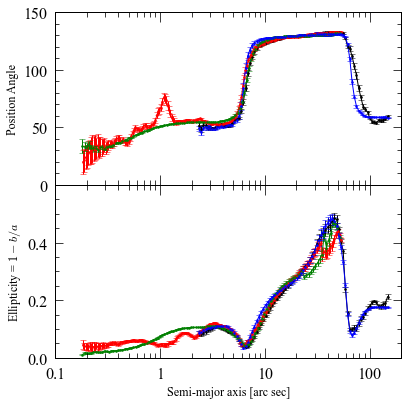

In [12]:
n4643irac1_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643irac1ss.fits",pix=0.75)
n4643irac1_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643irac1_model.fits",pix=0.75)
n4643f160w_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643f160w.fits",pix=0.06,telPA=114.6)
n4643f160w_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643f160w_model.fits",pix=0.06,telPA=114.6)

ellipse.PlotEllPA([n4643irac1_efit,n4643f160w_efit, n4643f160w_model,n4643irac1_model], xlog=True, merge=True,xrange=[0.1,200])                      
if savePlots:
    savefig(plotDir+"n4643_efits.pdf")

## Figure 5

In [13]:
n4608irac1ss_cutout = fits.getdata(dataDir + "spitzer_images/n4608irac1ss_fitted_cutout.fits")
n4608irac1ss_cutout_m5 = median_filter(n4608irac1ss_cutout, 5)

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:265: RuntimeWarning: invalid value encountered in log10
  imData = np.log10(imData)


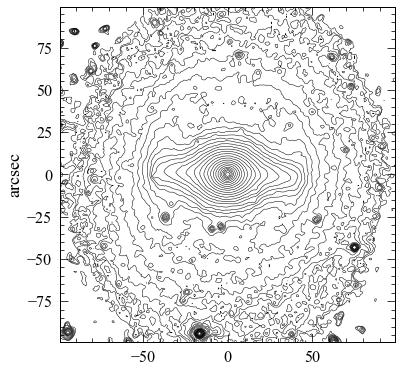

In [14]:
pu.nicecont(n4608irac1ss_cutout_m5, 166,166,330, log=True,levels=np.arange(0.8,4,0.1),\
pix=0.6,axisLabel='arcsec',printAxisLabels='y',labelSize=18)
if savePlots:
    savefig(plotDir+"n4608irac1ss_fitted_cutout_square_cont.pdf")

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:265: RuntimeWarning: divide by zero encountered in log10
  imData = np.log10(imData)


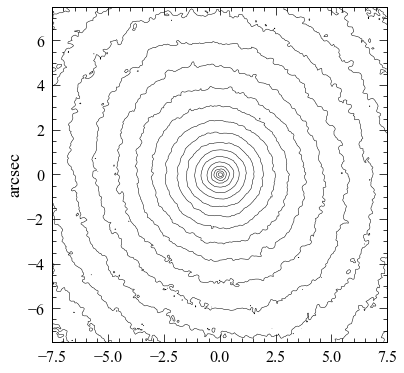

In [15]:
pu.nicecont(n4608f160w_im, 1429,1344,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
axisLabel='arcsec', printAxisLabels='y',labelSize=18)
if savePlots:
    savefig(plotDir+"n4608f160w_cont250_for_multiresiduals.pdf")

### Grayscale Data/Model Ratio Images

The grayscale resiedual-ratio images (panels b-e, g, and h) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.

To generate the model images, one can use the Imfit `makeimage` program and the best-fit parameter files (along with the appropriate PSF image files, with the original data image used to specify the output image size):

    $ makeimage bestfit_params_n4608irac1.dat -o model_irac1.fits --refimage=n4608irac1ss_adu.fits --psf=psf_irac1_0.6arcsec_51.fits

    $ makeimage bestfit_params_n4608f160w.dat -o model_f160w.fits --refimage=n4608_f160w.fits --psf=psf_f160w.fits

One can then make the residual-ratio images in Python. The following code shows how to do this for the "IRAC1 Final Model" (panel e) and "Final Model" (panel h).

    >>> data_im = fits.getdata(dataDir + "spitzer_images/n4608irac1ss_adu.fits")
    >>> model_im = fits.getdata("/path/to/model_irac1.fits")
    >>> irac1_residual_ratio_im = (data_im - model_im) / data_im
    >>> data_im = fits.getdata(dataDir + "hst_images/n4608_f160w.fits")
    >>> model_im = fits.getdata("/path/to/model_f160w.fits")
    >>> f160w_residual_ratio_im = (data_im - model_im) / data_im

## Figure 6

In [16]:
# IRAC1 image converted from MJy/sr to integrated ADU/pixel
n4608irac1ss_adu_im = fits.getdata(dataDir+"spitzer_images/n4608irac1ss_adu_derot.fits")
n4608irac1ss_adu_im_m5 = median_filter(n4608irac1ss_adu_im, 5)
model_irac1 = fits.getdata(dataDir + "model_images/n4608irac1_model_derot.fits")
model_irac1_m5 = median_filter(model_irac1, 5)

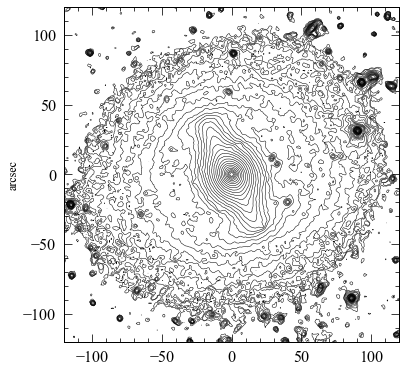

In [17]:
pu.nicecont(n4608irac1ss_adu_im_m5, 931,1189,400, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4608_irac1ss_m5_cont400_240x240arcsec.pdf")

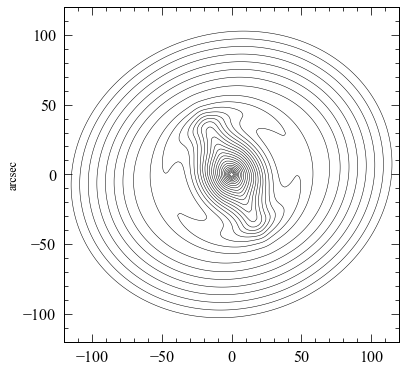

In [18]:
pu.nicecont(model_irac1_m5, 931,1189,400, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4608_irac1ss_model_240x240arcsec.pdf")

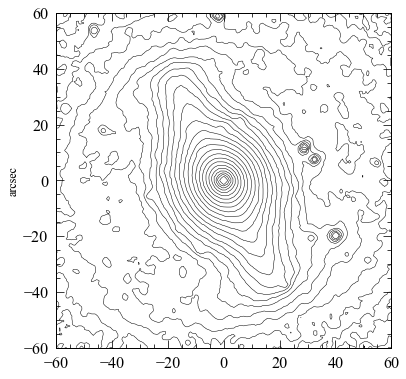

In [19]:
pu.nicecont(n4608irac1ss_adu_im_m5, 931,1189,200, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4608_irac1ss_m5_cont400_120x120arcsec.pdf")

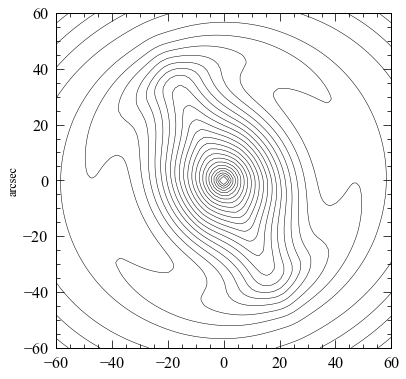

In [20]:
pu.nicecont(model_irac1_m5, 931,1189,200, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4608_irac1ss_model_120x120arcsec.pdf")

<ipython-input-21-4aa036d57631>:1: RuntimeWarning: divide by zero encountered in true_divide
  imratio_smooth = n4608irac1ss_adu_im_m5 / model_irac1_m5
<ipython-input-21-4aa036d57631>:1: RuntimeWarning: invalid value encountered in true_divide
  imratio_smooth = n4608irac1ss_adu_im_m5 / model_irac1_m5
<ipython-input-21-4aa036d57631>:2: RuntimeWarning: divide by zero encountered in true_divide
  imratio = n4608irac1ss_adu_im / model_irac1
<ipython-input-21-4aa036d57631>:2: RuntimeWarning: invalid value encountered in true_divide
  imratio = n4608irac1ss_adu_im / model_irac1


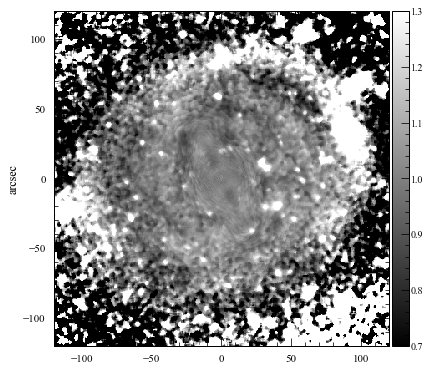

In [21]:
imratio_smooth = n4608irac1ss_adu_im_m5 / model_irac1_m5
imratio = n4608irac1ss_adu_im / model_irac1
pu.PlotImage(imratio_smooth, 931,1189,400, zrange=[0.7,1.3],cmap='gray', pix=0.6, axisLabel='arcsec', printAxisLabels='y', colorbarLabel=None)
if savePlots:
    savefig(plotDir+"n4608_irac1ss_residual-ratio_240x240arcsec.pdf")

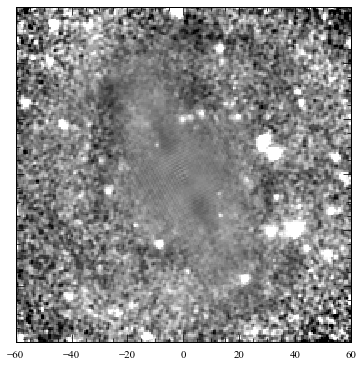

In [22]:
pu.PlotImage(imratio, 931,1189,200, zrange=[0.7,1.3],cmap='gray', pix=0.6, axisLabel='arcsec', printAxisLabels=None, colorbar=False)
# suppress y-axis tick labels
ax = plt.gca()
ax.set_yticklabels([])
if savePlots:
    savefig(plotDir+"n4608_irac1ss_residual-ratio_120x120arcsec.pdf")

## Figure 7

In [23]:
n4608f160w_im_m9 = median_filter(n4608f160w_im, 9)
model_f160w = fits.getdata(dataDir+"model_images/n4608f160w_model_derot.fits")
model_f160w_m9 = median_filter(model_f160w, 9)

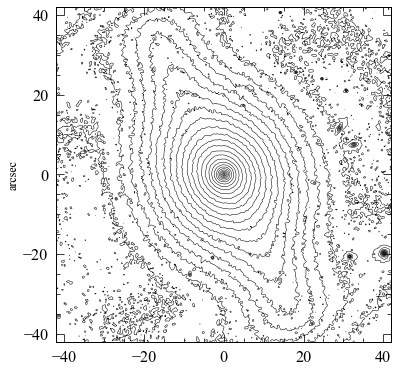

In [24]:
pu.nicecont(n4608f160w_im_m9, 1429,1344,1400, log=True,levels=np.arange(2.5,4.9,0.1),pix=0.06,\
axisLabel='arcsec', printAxisLabels='y')
if savePlots:
    savefig(plotDir+"n4608f160w_m9_cont1400.pdf")

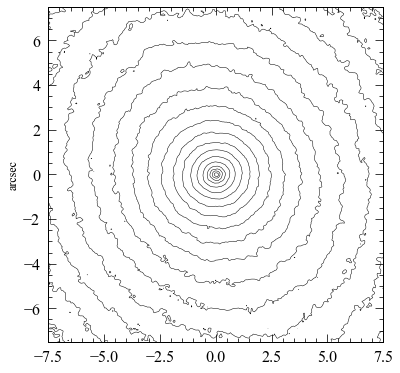

In [25]:
pu.nicecont(n4608f160w_im, 1429,1344,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
axisLabel='arcsec', printAxisLabels='y')
if savePlots:
    savefig(plotDir+"n4608f160w_cont250.pdf")

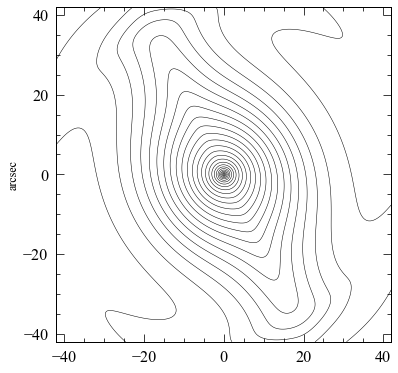

In [26]:
pu.nicecont(model_f160w_m9, 1429,1344,1400, log=True,levels=np.arange(2.5,4.9,0.1),pix=0.06,\
axisLabel='arcsec', printAxisLabels='y')
if savePlots:
    savefig(plotDir+"n4608_f160w_model_cont1400.pdf")

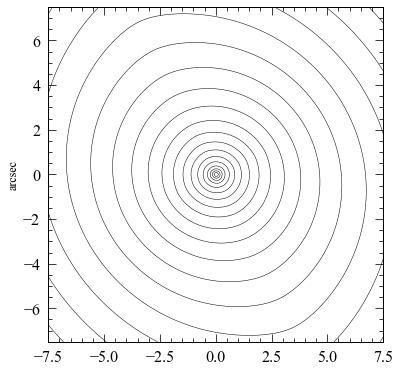

In [27]:
pu.nicecont(model_f160w, 1429,1344,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
axisLabel='arcsec', printAxisLabels='y')
if savePlots:
    savefig(plotDir+"n4608_f160w_model_cont250.pdf")

<ipython-input-28-f0ffe1ec05e4>:1: RuntimeWarning: divide by zero encountered in true_divide
  imratio_smooth = n4608f160w_im_m9 / model_f160w_m9
<ipython-input-28-f0ffe1ec05e4>:1: RuntimeWarning: invalid value encountered in true_divide
  imratio_smooth = n4608f160w_im_m9 / model_f160w_m9
<ipython-input-28-f0ffe1ec05e4>:2: RuntimeWarning: divide by zero encountered in true_divide
  imratio = n4608f160w_im / model_f160w
<ipython-input-28-f0ffe1ec05e4>:2: RuntimeWarning: invalid value encountered in true_divide
  imratio = n4608f160w_im / model_f160w


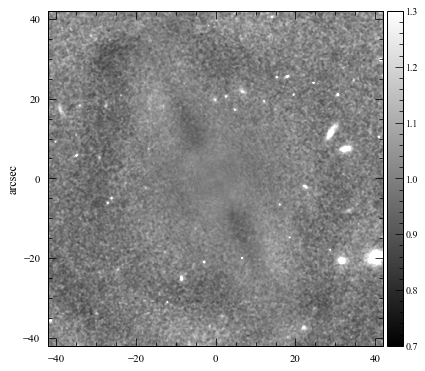

In [28]:
imratio_smooth = n4608f160w_im_m9 / model_f160w_m9
imratio = n4608f160w_im / model_f160w
pu.PlotImage(imratio_smooth, 1429,1344,1400, zrange=[0.7,1.3],cmap='gray', pix=0.06, axisLabel='arcsec', printAxisLabels='y', colorbarLabel=None)
if savePlots:
    savefig(plotDir+"n4608_f160w_residual-ratio_84x84arcsec.pdf")

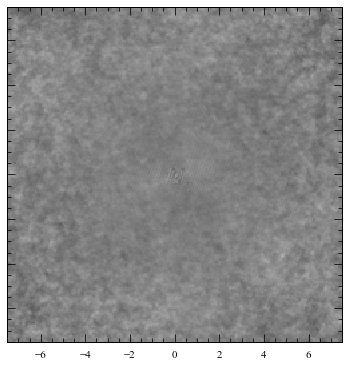

In [29]:
pu.PlotImage(imratio, 1429,1344,250, zrange=[0.7,1.3],cmap='gray', pix=0.06, axisLabel='arcsec', printAxisLabels=None, colorbar=False)
# suppress y-axis tick labels
ax = plt.gca()
ax.set_yticklabels([])
if savePlots:
    savefig(plotDir+"n4608_f160w_residual-ratio_15x15arcsec.pdf")

## Figure 8

In [30]:
n4643irac1ss_cutout = fits.getdata(dataDir + "spitzer_images/n4643irac1ss_fitted_cutout.fits")
n4643irac1ss_cutout_m3 = median_filter(n4643irac1ss_cutout, 3)

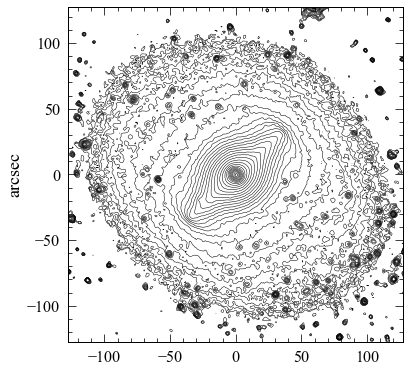

In [31]:
pu.nicecont(n4643irac1ss_cutout_m3, 247,232,340, log=True, levels=np.arange(2,5.5,0.1),\
pix=0.75,axisLabel='arcsec',printAxisLabels='y', labelSize=18)
if savePlots:
    savefig(plotDir+"n4643irac1ss_fitted_cutout_square_cont.pdf")

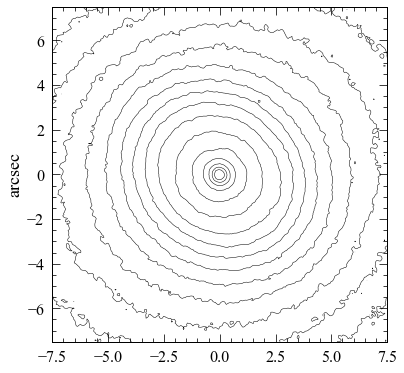

In [32]:
pu.nicecont(n4643f160w_im, 1416,1484,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
printAxisLabels='y',axisLabel='arcsec', labelSize=18)
if savePlots:
    savefig(plotDir+"n4643f160w_cont250_for_multiresiduals.pdf")

### Grayscale Data/Model Ratio Images

The grayscale resiedual-ratio images (panels b-e, g, and h) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.

To generate the model images, one can use the Imfit `makeimage` program and the best-fit parameter files (along with the appropriate PSF image files, with the original data image used to specify the output image size):

    $ makeimage bestfit_params_n4643irac1.dat -o model_irac1.fits --refimage=n4643irac1ss_adu.fits --psf=psf_irac1_0.6arcsec_51.fits

    $ makeimage bestfit_params_n4643f160w.dat -o model_f160w.fits --refimage=n4643_f160w.fits --psf=psf_f160w.fits


One can then make the residual-ratio images in Python. The following code shows how to do this for the "IRAC1 Final Model" (panel e) and "Final Model" (panel h).

    >>> data_im = fits.getdata(dataDir + "spitzer_images/n4643irac1ss_adu.fits")
    >>> model_im = fits.getdata("/path/to/model_irac1.fits")
    >>> irac1_residual_ratio_im = (data_im - model_im) / data_im
    >>> data_im = fits.getdata(dataDir + "hst_images/n4643_f160w.fits")
    >>> model_im = fits.getdata("/path/to/model_f160w.fits")
    >>> f160w_residual_ratio_im = (data_im - model_im) / data_im

## Figure 9

In [33]:
# IRAC1 image converted from MJy/sr to integrated ADU/pixel
n4643irac1ss_im = fits.getdata(dataDir + "spitzer_images/n4643irac1ss_adu.fits")
n4643irac1ss_im_m5 = median_filter(n4643irac1ss_im, 5)
model_irac1 = fits.getdata(dataDir + "model_images/n4643irac1_model.fits")
model_irac1_m5 = median_filter(model_irac1, 5)

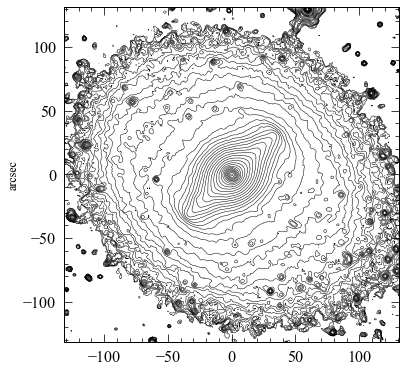

In [34]:
pu.nicecont(n4643irac1ss_im_m5, 446,781,350, log=True,levels=np.arange(1.5,5.3,0.1), pix=0.75,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643_irac1ss_m5_cont350.pdf")

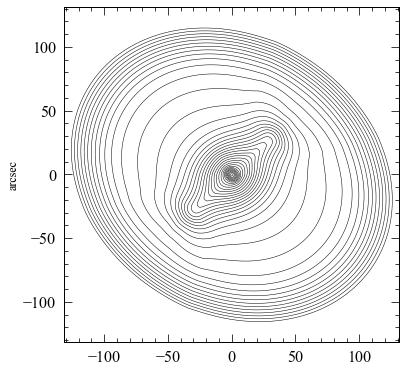

In [35]:
pu.nicecont(model_irac1_m5, 446,781,350, log=True,levels=np.arange(1.5,5.3,0.1), pix=0.75,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643_irac1ss_model_cont350.pdf")

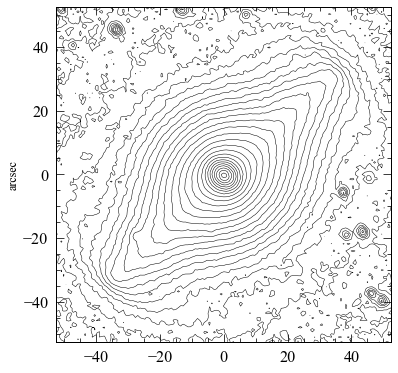

In [36]:
pu.nicecont(n4643irac1ss_im, 446,781,140, log=True,levels=np.arange(1.5,5.4,0.1), pix=0.75,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643_irac1ss_m5_cont140.pdf")

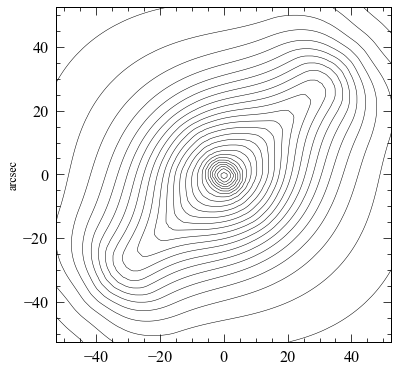

In [37]:
pu.nicecont(model_irac1_m5, 446,781,140, log=True,levels=np.arange(1.5,5.4,0.1), pix=0.75,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643_irac1ss_model_cont140.pdf")

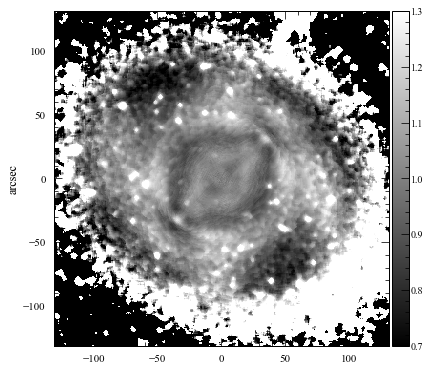

In [38]:
imratio_smooth = n4643irac1ss_im_m5 / model_irac1_m5
imratio = n4643irac1ss_im / model_irac1
pu.PlotImage(imratio_smooth, 446,781,350, zrange=[0.7,1.3],cmap='gray', pix=0.75, axisLabel='arcsec', printAxisLabels='y', colorbarLabel=None)
if savePlots:
    savefig(plotDir+"n4643_irac1ss_residual-ratio_cont350.pdf")

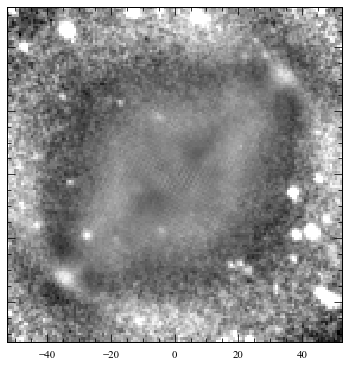

In [39]:
pu.PlotImage(imratio, 446,781,140, zrange=[0.7,1.3],cmap='gray', pix=0.75, axisLabel='arcsec', printAxisLabels=None, colorbar=False)
# suppress y-axis tick labels
ax = plt.gca()
ax.set_yticklabels([])
if savePlots:
    savefig(plotDir+"n4643_irac1ss_residual-ratio_cont140.pdf")

## Figure 10

In [40]:
n4643f160w_im_m9 = median_filter(n4643f160w_im, 9)
model_f160w = fits.getdata(dataDir+"model_images/n4643f160w_model_derot.fits")
model_f160w_m9 = median_filter(model_f160w, 9)

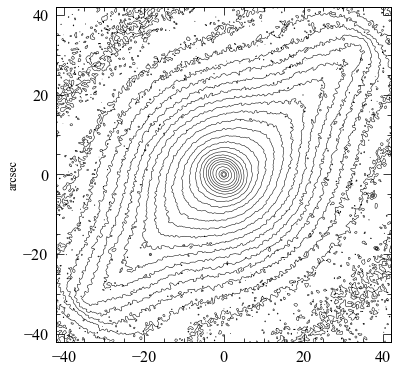

In [41]:
pu.nicecont(n4643f160w_im_m9, 1416,1484,1400, log=True,levels=np.arange(2.5,4.9,0.1),pix=0.06,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643f160w_m9_cont1400.pdf")

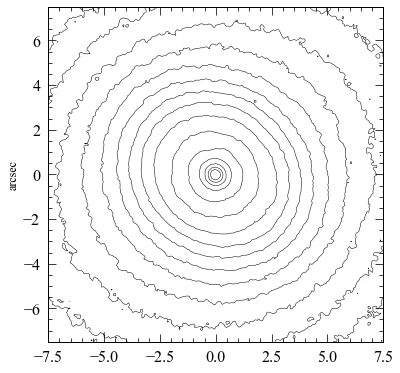

In [42]:
pu.nicecont(n4643f160w_im, 1416,1484,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643f160w_cont250.pdf")

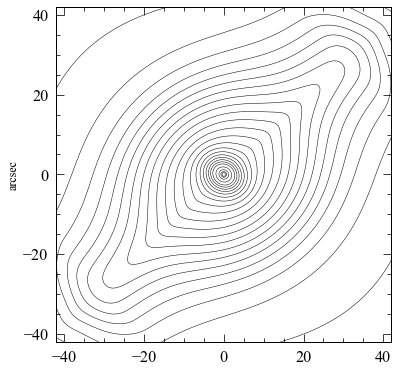

In [43]:
pu.nicecont(model_f160w_m9, 1416,1484,1400, log=True,levels=np.arange(2.5,4.9,0.1),pix=0.06,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643_model8d_m9_cont1400.pdf")

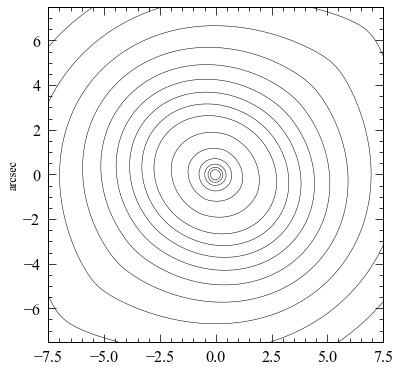

In [44]:
pu.nicecont(model_f160w, 1416,1484,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(plotDir+"n4643_model8d_cont250.pdf")

<ipython-input-45-694b6adcef1d>:1: RuntimeWarning: divide by zero encountered in true_divide
  imratio_smooth = n4643f160w_im_m9 / model_f160w_m9
<ipython-input-45-694b6adcef1d>:1: RuntimeWarning: invalid value encountered in true_divide
  imratio_smooth = n4643f160w_im_m9 / model_f160w_m9
<ipython-input-45-694b6adcef1d>:2: RuntimeWarning: divide by zero encountered in true_divide
  imratio = n4643f160w_im / model_f160w
<ipython-input-45-694b6adcef1d>:2: RuntimeWarning: invalid value encountered in true_divide
  imratio = n4643f160w_im / model_f160w


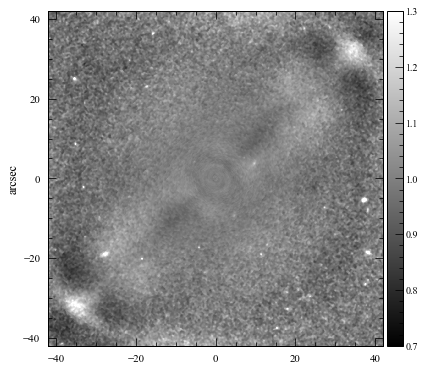

In [45]:
imratio_smooth = n4643f160w_im_m9 / model_f160w_m9
imratio = n4643f160w_im / model_f160w

pu.PlotImage(imratio_smooth, 1416,1484,1400, zrange=[0.7,1.3],cmap='gray', pix=0.06, axisLabel='arcsec', printAxisLabels='y', colorbarLabel=None, cbarLabelSize=11)
if savePlots:
    savefig(plotDir+"n4643_f160w_residual-ratio_84x84arcsec.pdf")

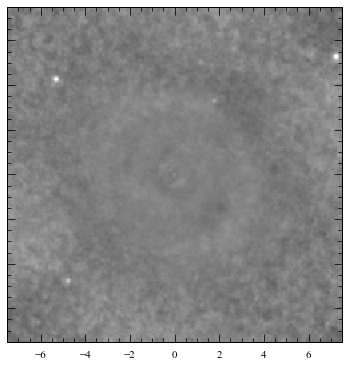

In [46]:
pu.PlotImage(imratio, 1416,1484,250, zrange=[0.7,1.3],cmap='gray', pix=0.06, axisLabel='arcsec', printAxisLabels=None, colorbar=False)
# suppress y-axis tick labels
ax = plt.gca()
ax.set_yticklabels([])
if savePlots:
    savefig(plotDir+"n4643_f160w_residual-ratio_15x15arcsec.pdf")

## Figure 11

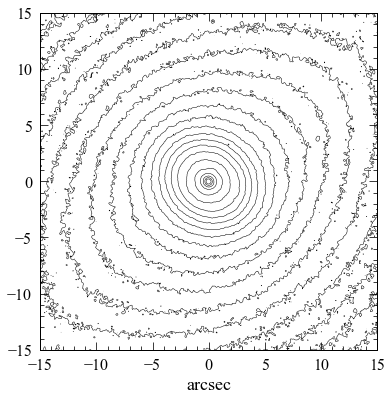

In [47]:
LABEL_SIZE=18
pu.nicecont(n4643f160w_im, 1416,1484,500, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
printAxisLabels='x',axisLabel='arcsec',labelSize=LABEL_SIZE)
plt.subplots_adjust(bottom=0.12)
if savePlots:
    savefig(plotDir+"n4643f160w_cont500.pdf")

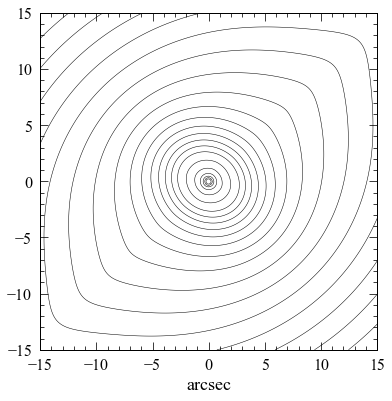

In [48]:
pu.nicecont(model_f160w, 1416,1484,500, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
printAxisLabels='x',axisLabel='arcsec',labelSize=LABEL_SIZE)
plt.subplots_adjust(bottom=0.12)
if savePlots:
    savefig(plotDir+"n4643_model8d_cont500.pdf")

### Grayscale Unsharp Mask Images

The grayscale unsharp-mask images (right two panels of the figure) were generated in IRAF using the `gauss` command (with a width of 15 pixels), followed by `imarith` to divide the original image by the smoothed image. These were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.9 to 1.1) and saved as JPEG images.

## Figure 12

In [49]:
n4608resid = fits.getdata(dataDir + "hst_images/n4608f160w_minus_bar+disk_derot.fits")
n4643resid = fits.getdata(dataDir + "hst_images/n4643f160w_minus_bar+disk_derot.fits")

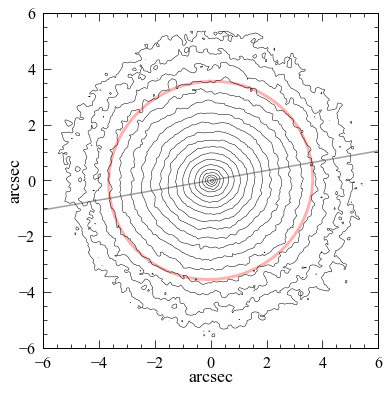

In [50]:
LABEL_SIZE=18
pu.nicecont(n4608resid, 1429,1344,200, log=True, levels=np.arange(3.3,5.5,0.1), pix=0.06, axisLabel='arcsec', labelSize=LABEL_SIZE)                                             
ax = gca()
ax.set_xlabel("arcsec", fontsize=18, labelpad=-2)                                             
ax.set_ylabel("arcsec", fontsize=18, labelpad=-5)
# add galaxy major-axis PA, ellipse at r_e from best-fit inner Sersic
pu.DrawPALine(100, 6, fmt='--', color='0.25', linewidth=1.5, alpha=0.5)
pu.DrawEllipse(108.6, 3.67, 0.036, 'r', linewidth=3, alpha=0.3)
if savePlots:
    savefig(plotDir+"n4608_bulge_residual.pdf")

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:684: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  ii = profile_line(imdata, (y0 - 1, x0 - 1), (y1 - 1, x1 - 1), linewidth=width,


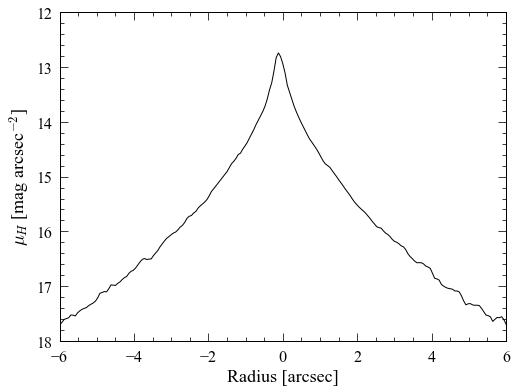

In [51]:
# Major-axis cut through residual classical bulge
rr4608,ii4608 = pu.GetProfileAtAngle(n4608resid, 1429 - 1,1344 - 1,108.6 + 90,180)
# convert to mu_H
mu4608 = 25.5255 - 2.5*np.log10(ii4608) + 0.025
clf();plot(rr4608*0.06,mu4608, 'k');xlim(-6,6);ylim(18,12)
xlabel("Radius [arcsec]", fontsize=LABEL_SIZE)
ylabel(r"$\mu_{H}$ [mag arcsec$^{-2}$]", fontsize=LABEL_SIZE)
subplots_adjust(bottom=0.14)
if savePlots:
    savefig(plotDir+"n4608_cb_residual_major-axis.pdf")

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:684: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  ii = profile_line(imdata, (y0 - 1, x0 - 1), (y1 - 1, x1 - 1), linewidth=width,


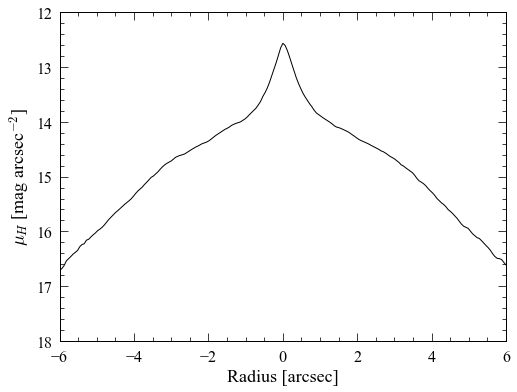

In [52]:
rr4643,ii4643 = pu.GetProfileAtAngle(n4643resid, 1416 - 1,1484 - 1 - 1,52.6 + 90,170)
# convert to mu_H
mu4643 = 25.5255 - 2.5*np.log10(ii4643) + 0.025
plot(rr4643*0.06,mu4643, 'k');xlim(-6,6);ylim(18,12)
xlabel("Radius [arcsec]", fontsize=LABEL_SIZE)
ylabel(r"$\mu_{H}$ [mag arcsec$^{-2}$]", fontsize=LABEL_SIZE)
subplots_adjust(bottom=0.14)
if savePlots:
    savefig(plotDir+"n4643_nd_residual_major-axis.pdf")


## Figure 13

This figure makes use of SAURON stellar kinematics from the ATLAS3D survey ([Cappellari et al. 2011](https://ui.adsabs.harvard.edu/abs/2011MNRAS.413..813C/abstract)); the data can be retrieved [here](http://www-astro.physics.ox.ac.uk/atlas3d/tables.html) (i.e., the "2-dim Stellar Kinematics content" files).